In [4]:
from votekit.plots import multi_profile_fpv_plot, profile_fpv_plot
import votekit.ballot_generator as bg

# generate a profile to work with first
candidates = ["A", "B", "C"]

# initializing the ballot generator
ic = bg.ImpartialCulture(candidates=candidates)
iac = bg.ImpartialAnonymousCulture(candidates=candidates)

profile1 = ic.generate_profile(number_of_ballots=1000)
profile2 = iac.generate_profile(number_of_ballots=1000)

print("IC profile:")
print(profile1.df)
print()
print("IAC profile:")
print(profile2.df)

IC profile:
             Ranking_1 Ranking_2 Ranking_3 Voter Set  Weight
Ballot Index                                                
0                  (A)       (C)       (B)        {}   163.0
1                  (B)       (C)       (A)        {}   151.0
2                  (A)       (B)       (C)        {}   167.0
3                  (C)       (A)       (B)        {}   169.0
4                  (C)       (B)       (A)        {}   165.0
5                  (B)       (A)       (C)        {}   185.0

IAC profile:
             Ranking_1 Ranking_2 Ranking_3 Voter Set  Weight
Ballot Index                                                
0                  (B)       (A)       (C)        {}    66.0
1                  (C)       (A)       (B)        {}   149.0
2                  (C)       (B)       (A)        {}   275.0
3                  (A)       (B)       (C)        {}   292.0
4                  (A)       (C)       (B)        {}   193.0
5                  (B)       (C)       (A)        {}    25.

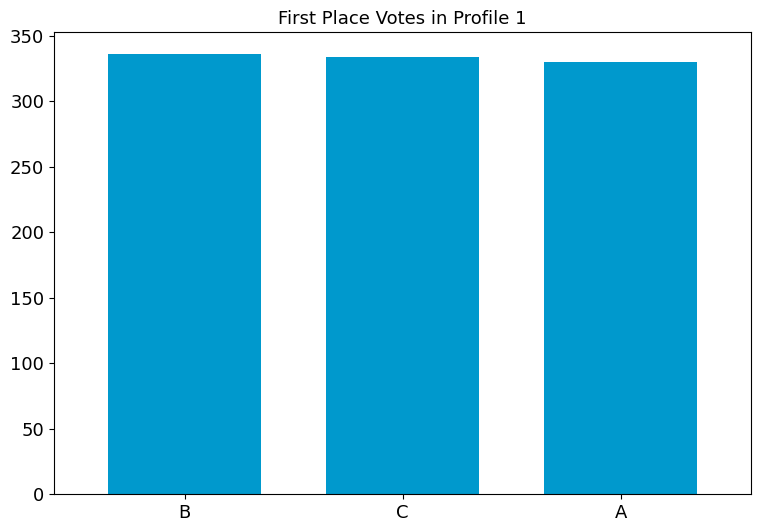

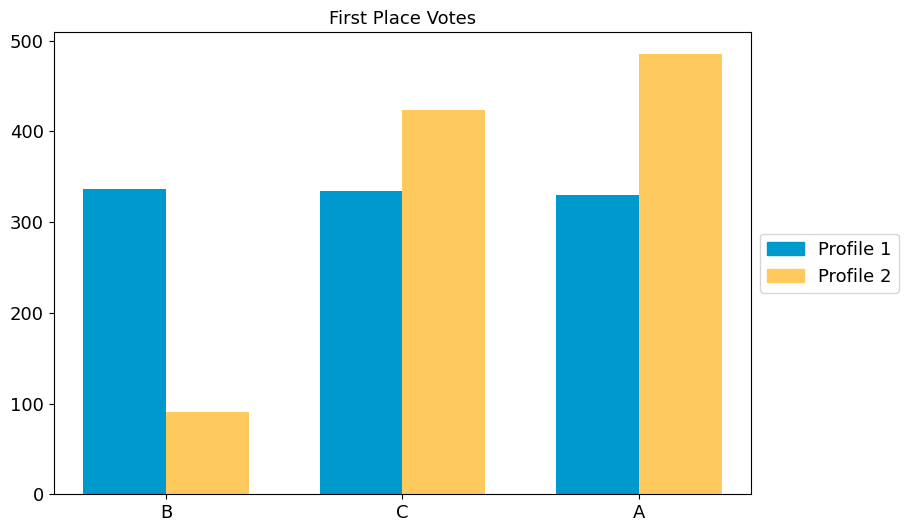

In [5]:
fig1 = profile_fpv_plot(profile1, title="First Place Votes in Profile 1")
fig2 = multi_profile_fpv_plot(
    {"Profile 1": profile1, "Profile 2": profile2},
    title="First Place Votes",
    show_profile_legend=True,
)

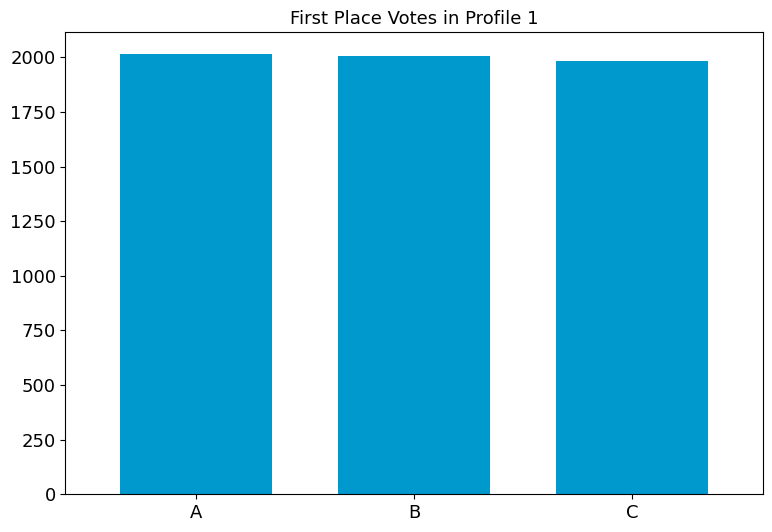

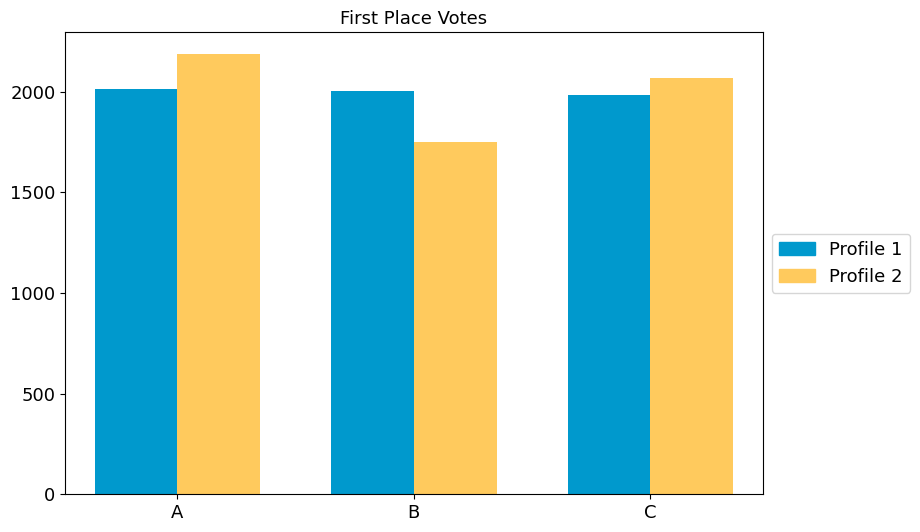

In [10]:
from votekit.plots import (
    multi_profile_borda_plot,
    multi_profile_ballot_lengths_plot,
    profile_borda_plot,
    profile_ballot_lengths_plot,
)

fig1 = profile_borda_plot(profile1, title="First Place Votes in Profile 1")
fig2 = multi_profile_borda_plot(
    {"Profile 1": profile1, "Profile 2": profile2},
    title="First Place Votes",
    show_profile_legend=True,
)

Profile contains rankings: True
Maximum ranking length: 4
Profile contains scores: False
Candidates: ('C1', 'W2', 'C2', 'W1')
Candidates who received votes: ('W1', 'C2', 'C1', 'W2')
Total number of Ballot objects: 40
Total weight of Ballot objects: 1000.0



<Axes: >

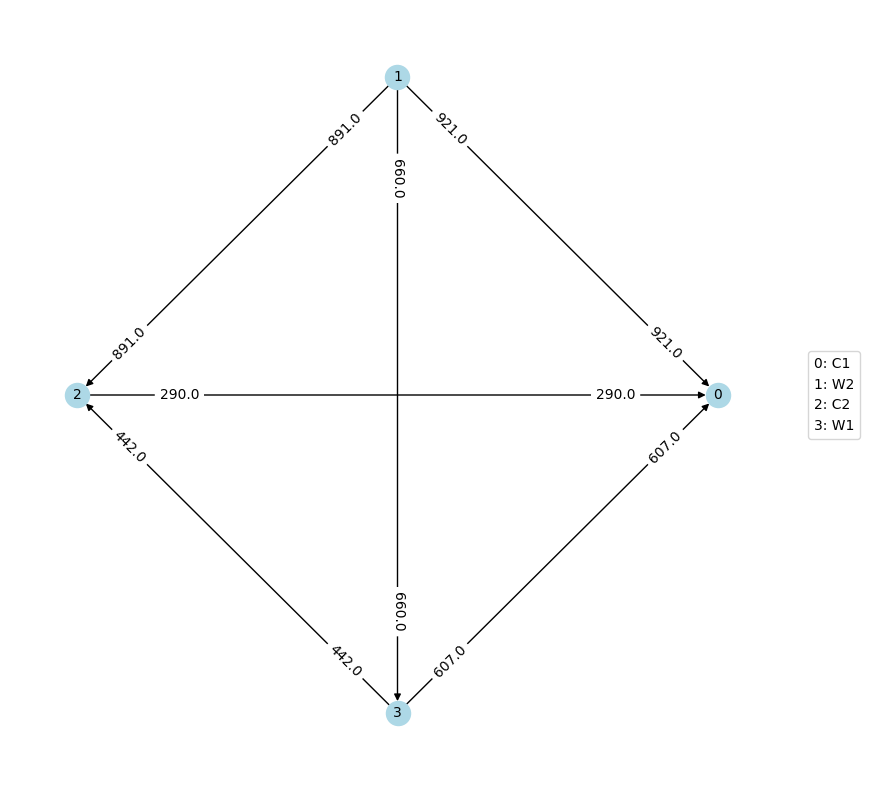

In [16]:
from votekit.graphs import PairwiseComparisonGraph

bloc_voter_prop = {"W": 0.999, "C": 0.001}

# the values of .9 indicate that these blocs are highly polarized;
# they prefer their own candidates much more than the opposing slate
cohesion_parameters = {"W": {"W": 0.99, "C": 0.01}, "C": {"C": 0.01, "W": 0.99}}

dirichlet_alphas = {"W": {"W": 1, "C": 1}, "C": {"W": 1, "C": 1}}

slate_to_candidates = {"W": ["W1", "W2"], "C": ["C1", "C2"]}

cs = bg.CambridgeSampler.from_params(
    slate_to_candidates=slate_to_candidates,
    bloc_voter_prop=bloc_voter_prop,
    cohesion_parameters=cohesion_parameters,
    alphas=dirichlet_alphas,
)

profile = cs.generate_profile(number_of_ballots=1000)
print(profile)

pwc_graph = PairwiseComparisonGraph(profile)
pwc_graph.draw()